Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Vaja 2: Sivinske preslikave slik
## Navodila
Sivinske preslikave so poljubne preslikave $\mathcal{T}: \mathbb{R} \rightarrow \mathbb{R}$ dinamičnega območja $[0,L_r-1]$ referenčne slike $r(x,y)$ v dinamično območje $[0, L_s-1]$ preslikane slike $s(x,y)$. Preslikavo izvedemo na vseh slikovnih elementih referenčne slike kot $s(x, y) = \mathcal{T}( r(x,y) )$. Glavni namen sivinskih preslikav je **povečanje kontrasta** struktur zanimanja, uporabljajo pa se tudi za **prilagoditev dinamičnega območja** referenčne slike za potrebe prikazovanja. Pri vaji boste spoznali linearno preslikavo, oknjenje, upragovljanje in nelinearno gama preslikavo.

![](./images/RV_3_SLO_Transformacije.png)

Barvo slikovnega elementa običajno definiramo s tremi, včasih pa celo z dvema komponentama oz. vrednostima. Zaradi načina pretvorbe svetlobe v digitalni zapis se najpogosteje uporablja zapis barve s komponentami $RGB$, ki ustrezajo trem različnim detektorjem svetlobe in ki so selektivno občutljivi pri valovnih dolžinah svetlobe okoli 700 nm ($R$), 550 nm ($G$) in 450 nm ($B$). Obstajajo tudi drugi barvni prostori, ki so bolj primerni za analizo digitalnih slik, naprimer $HSV$ in $L^*a^*b^*$. Sliko v RGB barvnem prostoru lahko pretvorimo v drug barvni prostor z (ne)linearno preslikavo $RGB$ komponent.

![](./images/RV_3_Pretvorba_RGB_HSV.png)


## Naloge
Pri vaji boste napisali funkcije sivinskih preslikav in funkcije za pretvorbo $RGB$ slik v $HSV$ barvni prostor ter preizkusili delovanje teh funkcij na sivinski in barvni sliki. 

1. Naložite barvno $RGB$ sliko `./data/slika.jpg` v okolje Python z ukazom `open()` v knjižnici `PIL.Image` in jo pretvorite v 8-bitno sivinsko sliko kot $S=0,299R+0,587G+0,114B$. Poskrbite za ustrezno zaokroževanje in pretvorbo tipa sivinskih vrednosti slikovnih elementov. 

In [5]:
import numpy as np
import PIL.Image as Image

# nalaganje slike
slika = Image.open("./data/slika.jpg")
slika_arr = np.array(slika)

# Funkcija za pretvarjanje
def convertToGray(image):
    #your code here:
    oImage = np.zeros((image.shape[0], image.shape[1]))
    oImage[:, :] = (0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]).astype(np.uint8)
    return oImage

slika_gray = convertToGray(slika_arr)

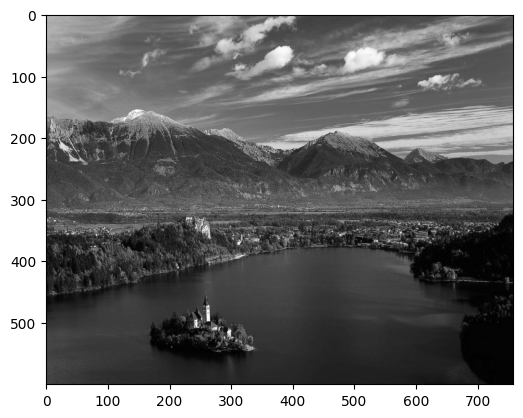

In [9]:
#import rvlib
import matplotlib.pyplot as plt

def showImage(image, iTitle=''):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(iTitle)
    plt.show()

showImage(slika_gray)

2. Napišite funkcijo za poljubno linearno sivinsko preslikavo sivinske slike `iImage`:
    ```python
	def scaleImage( iImage, iSlopeA, iIntersectionB ):
        return oImage
    ```
    kjer sta `iSlopeA` in `iIntersectionB` parametra $a$ in $b$ linearne preslikave. Funkcija vrne linearno preslikano sivinsko sliko `oImage`, ki naj bo enakega tipa kot vhodna slika. Minimalne in maksimalne vrednosti celoštevilskih podatkovnih tipov dobite z `numpy.iinfo(dtype).min` in `numpy.iinfo(dtype).max`. Preverite delovanje funkcije na sivinski sliki s poljubno linearno sivinsko preslikavo.

In [36]:
def scaleImage(iImage, iSlopeA, iIntersectionB):
   #your code here
   dtype = iImage.dtype
   oImage = iImage * iSlopeA + iIntersectionB
   if dtype.kind in ('i', 'u'):
      oImage = np.clip(oImage, np.iinfo(dtype).min, np.iinfo(dtype).max)
   return oImage.astype(dtype)

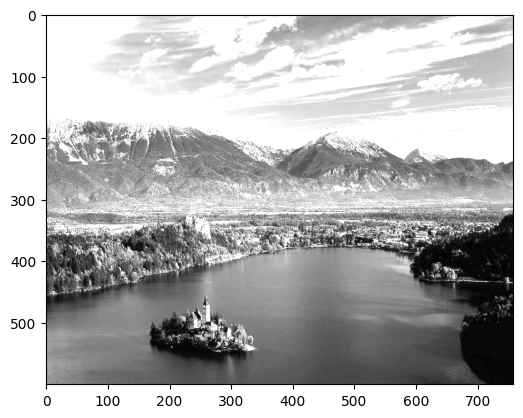

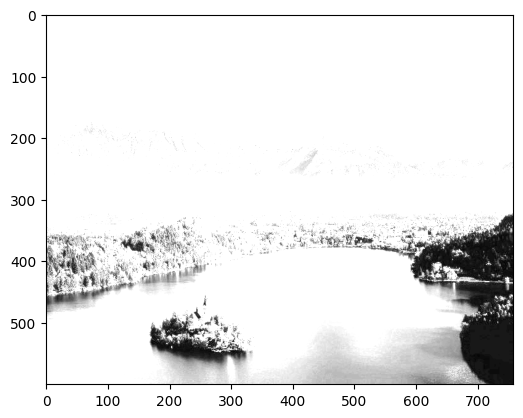

In [39]:
slika_scaled = scaleImage(slika_gray.astype('uint8'), 2.0, 32)
showImage(slika_scaled)
slika_scaled_2 = scaleImage(slika_gray.astype('uint8'), 6.0, 0)
showImage(slika_scaled_2)

3. Napišite funkcijo za poljubno linearno sivinsko oknjenje sivinske slike `iImage`:
    ```python
    def windowImage( iImage, iCenter, iWidth ):
        return oImage
    ```
	kjer sta `iCenter` in `iWidth` parametra $c$ in $w$ linearnega oknjenja. Funkcija naj vrne linearno sivinsko oknjeno sliko `oImage`, ki naj bo enakega tipa kot vhodna slika. Minimalne in maksimalne vrednosti celoštevilskih podatkovnih tipov dobite z `numpy.iinfo( dtype ).min` in `numpy.iinfo( dtype ).max`. Preverite delovanje funkcije na sivinski sliki s poljubnim sivinskim oknjenjem.

In [46]:
def windowImage(iImage, iCenter, iWidth):
    #Your code here
    #oImage = np.array(iImage, dtype=np.float)
    '''
    oImage = np.copy(iImage)
    dtype = iImage.dtype
    oImage[iImage < iCenter - iWidth/2] = np.iinfo(dtype).min
    oImage[iImage > iCenter + iWidth/2] = np.iinfo(dtype).max
    idx = np.logical_and(iImage >= iCenter - iWidth/2, iImage <= iCenter + iWidth/2)
    oImage[idx] = (np.iinfo(dtype).max) / iWidth * (iImage[idx] - (iCenter - iWidth/2))
    return oImage.astype(dtype)
    '''
    dtype = iImage.dtype
    if dtype.kind in ('i', 'u'):
        iRange = np.iinfo(dtype).max - np.iinfo(dtype).min
    else:
        iRange = iImage.max() - iImage.min()
    iSlope = iRange / iWidth
    iIntersection = -iSlope * (float(iCenter) - iWidth / 2)
    return scaleImage(iImage, iSlope, iIntersection)

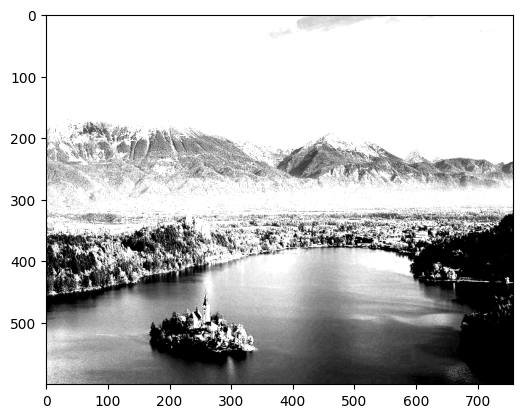

In [49]:
slika_window = windowImage(slika_gray.astype('uint8'), iCenter=50, iWidth=50)
showImage(slika_window)

4. Napišite funkcijo za poljubno sivinsko upragovljanje sivinske slike `iImage`:
    ```python
    def thresholdImage( iImage, iThreshold ):
        return oImage
    ```
    kjer je `iThreshold` parameter upragovljanja oz. prag $t$. Funkcija vrne upragovljeno sliko `oImage`. Preverite delovanje funkcije na sivinski sliki s poljubnim pragom $t$.

In [52]:
def thresholdImage(iImage, iThreshold):
      #Your code here
      '''
      oImage = np.array(iImage)
      oImage[iImage <= iThreshold] = 0
      oImage[iImage > iThreshold] = 255
      '''
      dtype = iImage.dtype
      oImage = np.where(iImage > iThreshold, np.iinfo(dtype).max, 0)
      #oImage = 255 * np.array(iImage > iThreshold, dtype=np.uint8)
      return oImage

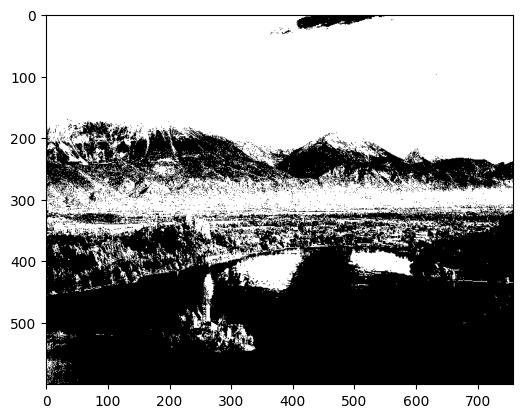

In [51]:
slika_threshold = thresholdImage(slika_gray.astype('uint8'), iThreshold=70)
showImage(slika_threshold)

5. Napišite funkcijo za poljubno gama sivinsko preslikavo sivinske slike `iImage`:
    ```python
    def gammaImage( iImage, iGamma ):
        return oImage
    ```
    kjer je `iGamma` parameter $\gamma$. Funkcija naj vrne gama sivinsko preslikano sliko `oImage`, ki naj bo enakega tipa kot vhodna slika. Preverite delovanje funkcije na sivinski sliki z $\gamma>1$ in $\gamma<1$ in analizirajte vpliv na histogram slike.

In [53]:
def gammaImage(iImage, iGamma):
    #Your Code here
    #oImage = 255 ** (1 - iGamma) * iImage ** iGamma
    dtype = iImage.dtype
    iImage = iImage.astype('float')
    if dtype.kind in ('i', 'u'):
        iRange = np.iinfo(dtype).max - np.iinfo(dtype).min
    else:
        iRange = iImage.max() - iImage.min()
    iImage = (iImage - iImage.min()) / iRange
    oImage = iImage ** iGamma
    oImage = oImage * iRange + iImage.min()
    return oImage

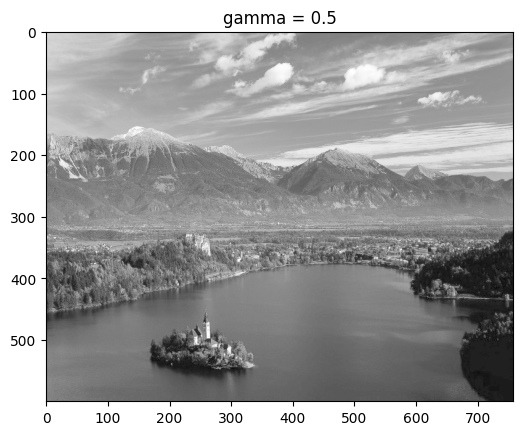

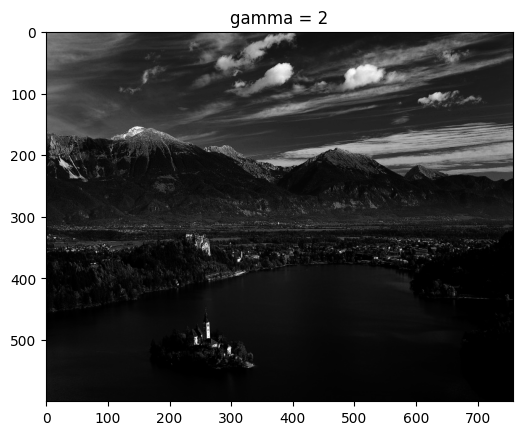

In [55]:
slika_gamma_05 = gammaImage(slika_gray, iGamma=0.5)
slika_gamma_2 = gammaImage(slika_gray, iGamma=2)
showImage(slika_gamma_05, iTitle='gamma = 0.5')
showImage(slika_gamma_2, iTitle='gamma = 2')

6. Napišite funkcijo za preslikavo barvne slike `iImage` med $RGB$ in $HSV$ barvnimi prostori:
    ```python
    def convertImageColorSpace( iImage, iConversionType ):
        return oImage
    ```
	kjer `iConversionType` določa pretvorbo iz izvornega v ciljni barvni prostor in lahko zavzame vrednosti `'RGBtoHSV'` ali `'HSVtoRGB'`. Preverite delovanje funkcije s pretvorbo barvne slike iz $RGB$ v $HSV$ prostor in nato nazaj iz $HSV$ v $RGB$. Dobljena slika mora biti enaka vhodni sliki.

In [ ]:
def convertRGB2HSV(iImage): 
    iImage = iImage.astype('float')
    iImage = iImage/255 # bo samo 8-bitna
    r, g, b = iImage[:,:,0],iImage[:,:,1],iImage[:,:,2]
    
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    
    Cmax = np.maximum(r, np.maximum(g,b))
    Cmin = np.minimum(r, np.minimum(g,b))
    delta = Cmax - Cmin + 1e-7
    
    h[Cmax == r] = 60.0 * ((g[Cmax==r] - b[Cmax==r])/ delta[Cmax == r] % 6.0) # 60 deg
    
    h[Cmax == g] = 60.0 * ((b[Cmax==g] - r[Cmax==g])/ delta[Cmax == g] + 2.0)
    
    h[Cmax == b] = 60.0 * ((r[Cmax==b] - g[Cmax==b])/ delta[Cmax == b]  + 4.0)
    
    s[delta!=0.0] = delta[delta!=0.0]/(Cmax[delta!=0.0] + 1e-7)
    
    v = Cmax
    
    # ustvari izhodno sliko
    oImage = np.zeros_like(iImage)
    oImage[:,:,0] = h
    oImage[:,:,1] = s
    oImage[:,:,2] = v
    
    return oImage

In [ ]:
def convertHSV2RGB(iImage):
    """Pretvorba barvne slike iz barvnega prostora HSV v RGB"""
    iImage = iImage.astype('float')
    
    h, s, v = iImage[:,:,0], iImage[:,:,1], iImage[:,:,2]
    
    C = v * s
    X = C * (1.0 - np.abs(((h/60.0) % 2) -1))
    m = v - C 
    
    r = np.zeros_like( h )
    g = np.zeros_like( h )
    b = np.zeros_like( h )
    
    #  0<= H < 60
    r[(h>=0.0) & (h<60.0)] = C[(h>=0.0) & (h<60.0)]
    g[(h>=0.0) & (h<60.0)] = X[(h>=0.0) & (h<60.0)]
    # b[(h>=0) & h(<60.0)] = 0

    # 60 <= H <120
    r[(h>=60.0) & (h<120.0)] = X[(h>=60.0) & (h<120.0)]
    g[(h>=60.0) & (h<120.0)] = C[(h>=60.0) & (h<120.0)]
    
    # 120 <= H < 180
    g[(h>=120.0) & (h<180.0)] = C[(h>=120.0) & (h<180.0)]
    b[(h>=120.0) & (h<180.0)] = X[(h>=120.0) & (h<180.0)]
                                  
    # 180 <= H < 240 
    g[(h>=180.0) & (h<240.0)] = X[(h>=180.0) & (h<240.0)]
    b[(h>=180.0) & (h<240.0)] = C[(h>=180.0) & (h<240.0)]
                                  
    # 240 <= H < 300
    r[(h>=240.0) & (h<300.0)] = X[(h>=240.0) & (h<300.0)]
    b[(h>=240.0) & (h<300.0)] = C[(h>=240.0) & (h<300.0)]
                                 
    # 300 <= H <360
    r[(h>=300.0) & (h<360.0)] = C[(h>=300.0) & (h<360.0)]
    b[(h>=300.0) & (h<360.0)] = X[(h>=300.0) & (h<360.0)]
                                  
    r = r + m
    g= g + m
    b = b + m
    
    # ustvari izhodno sliko
    oImage = np.zeros_like(iImage)
    oImage[:,:,0] = r
    oImage[:,:,1] = g
    oImage[:,:,2] = b
    
    # zaokrozevanje vrednsti
    oImage = 255.0 * oImage
    oImage[oImage>255.0]  = 255.0
    oImage[oImage<0.0] = 0.0
    
    oImage = oImage.astype('uint8')
    return oImage

In [ ]:
slika_hsv = convertRGB2HSV(slika_arr)
slika_rgb = convertHSV2RGB(slika_hsv)

rvlib.showImage(slika_arr, "RGB slika")
rvlib.showImage(slika_hsv[:,:,0]/360*255, "H komponenta HSV slike")

In [ ]:
rvlib.showImage(slika_hsv[:,:,1]*255, "S komponenta HSV slike")

In [ ]:
rvlib.showImage(slika_hsv[:,:,2]*255, "V komponenta HSV slike")